In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Product.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Description,UnitPrice,Country,Quantity
0,15624510,Male,19,19000,0,WHITE HANGING HEART T-LIGHT HOLDER,2.55,United Kingdom,6
1,15810944,Male,35,20000,0,WHITE METAL LANTERN,3.39,United Kingdom,6
2,15668575,Female,26,43000,0,CREAM CUPID HEARTS COAT HANGER,2.75,United Kingdom,8
3,15603246,Female,27,57000,0,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,United Kingdom,6
4,15804002,Male,19,76000,0,RED WOOLLY HOTTIE WHITE HEART.,3.39,United Kingdom,6
...,...,...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,SAVE THE PLANET MUG,NaN,United Kingdom,211
396,15706071,Male,51,23000,1,SAVE THE PLANET MUG,NaN,United Kingdom,212
397,15654296,Female,50,20000,1,SAVE THE PLANET MUG,NaN,United Kingdom,213
398,15755018,Male,36,33000,0,SAVE THE PLANET MUG,NaN,United Kingdom,214


In [3]:
X=data.iloc[:,[8,3]].values
Y=data.iloc[:,4].values

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2)
np.shape(X_train)

(320, 2)

In [6]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_predicted=model.predict(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
y_predicted

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
Y_test

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
matrix=confusion_matrix(Y_test,y_predicted)
matrix

array([[36, 12],
       [ 9, 23]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        48
           1       0.66      0.72      0.69        32

    accuracy                           0.74        80
   macro avg       0.73      0.73      0.73        80
weighted avg       0.74      0.74      0.74        80



In [12]:
accuracy_score(Y_test, y_predicted)

0.7375

Text(0.5, 63.222222222222186, 'Predicted label')

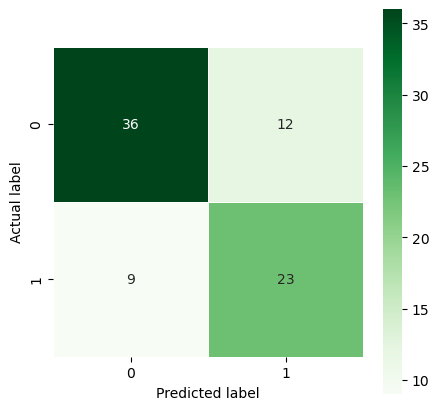

In [13]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test,y_predicted),linewidths=.5, annot=True,square = True,  cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')